# Creating a Shallow Neural Network

Creating a neural network model with 1 hidden layer. The used acitvation function is *tanh* in hidden layer and *sigmoid* in output layer.

[**1. Initialization**](#1.-Initialization)

[**2. Model Building**](#2.-Model-Building)

[**3. Hyperparameter Tunning**](#3.-Hyperparameter-Tunning)

[**4. Predicting and Evaluation**](#4.-Predicting-and-Evaluation)


## 1. Initialization

### 1.1. Package imports

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 1.2. Loading Data

**m**: total number of samples  
**n_x**: number of features  
**n_y**: number of output classes  
**X**: input data  
**Y**: labels  
**newY**: labels extracted into rows of different classes as bool

In [6]:
data = pd.read_csv("winequality-red.csv")

shape_data = data.shape
m = shape_data[0]
n_x = shape_data[1]-1
n_y = 6

X = np.reshape(np.array(data.iloc[:,:n_x]),(m,n_x))
X = X.T
Y = np.reshape(np.array(data.iloc[:,n_x]),(m,1))
Y = Y.T

newY = np.empty((0,m), int)
for i in range(3,9):
    newY = np.append(newY,(Y==i).astype(int),axis=0)

shape_X = np.shape(X)
shape_Y = np.shape(Y)
shape_newY = np.shape(newY)


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('The shape of newY is: ' + str(shape_newY))
print ('Total number of examples: %d' % (m))

The shape of X is: (11, 1599)
The shape of Y is: (1, 1599)
The shape of newY is: (6, 1599)
Total number of examples: 1599


### 1.3. Deviding Data into Train, Cross Validation and Test sets

**train**: training set (60%)  
**cv**: cross validation set (20%)  
**test**: test set (20%)  

In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(X.T, newY.T, train_size = 0.8)
X_train , X_cv , Y_train , Y_cv = train_test_split(X_train, Y_train, train_size = 0.75)
X_train = X_train.T
X_cv = X_cv.T
X_test = X_test.T
Y_train = Y_train.T
Y_cv = Y_cv.T
Y_test = Y_test.T

## 2. Model Building

### 2.1. Normalizing the data

In [8]:
def normalize(X):
    
    mean = np.mean(X,axis=1)
    mean = np.reshape(mean,(np.shape(mean)[0],1))
    std = np.std(X,axis=1)
    std = np.reshape(std,(np.shape(std)[0],1))
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

### 2.2. Defining neural network structure

**n_x**: the size of the input layer (this is number of features)  
**n_h**: the size of the hidden layer (this is initially set to 8, but will be tunned in next section)  
**n_y**: the size of the output layer (based on the data, Y has 6 unique values from 3 to 8 inclusive)

In [9]:
n_x
n_h = 8
n_y

print("n_x = %d \nn_h = %d \nn_y = %d" %(n_x,n_h,n_y))

n_x = 11 
n_h = 8 
n_y = 6


### 2.3. Initializing the model's parameters

**parameters**: python dictionary containing:  
*W1*: weight matrix of shape (n_h, n_x)  
*b1*: bias vector of shape (n_h, 1)  
*W2*: weight matrix of shape (n_y, n_h)  
*b2*: bias vector of shape (n_y, 1)

In [10]:
def initialize_parameters(n_x, n_h, n_y, scaling_factor):
    
    W1 = np.random.randn(n_h,n_x)*scaling_factor
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*scaling_factor
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 2.4. Defining Sigmoid function

In [11]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
        
    return s

### 2.5. Implementing forward propagation

**Z1**: W1\*X+b1  
**A1**: The tanh output of the first layer activation  
**Z2**: W2\*A1+b2  
**A2**: The sigmoid output of the second layer activation  
**tmp**: a dictionary containing "Z1", "A1", "Z2" and "A2"

In [12]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
        
    assert(A2.shape == (n_y, X.shape[1]))
    
    tmp = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2}
    
    return A2, tmp

### 2.6. Computing Cost

**cost**: cross-entropy cost

In [13]:
def compute_cost(A2, Y):
    
    m = Y.shape[1]

    cost = (-1/m)*np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost = float(np.squeeze(cost))  # making sure cost is the dimension I expect!
                                    
    assert(isinstance(cost, float))
    
    return cost

### 2.7. Implementing backward propagation

**grads**: python dictionary containing gradients with respect to different parameters

In [14]:
def backward_propagation(parameters, tmp, X, Y):

    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
    A1 = tmp["A1"]
    A2 = tmp["A2"]

    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### 2.8. Parameters update

In [15]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 2.9. Integrating the Model

In [25]:
def nn_model(X, Y, n_h=4, scaling_factor=0.01, learning_rate=1.2, num_iterations = 10000, print_cost=False):

    parameters = initialize_parameters(n_x, n_h, n_y, scaling_factor)
    
    X , mean, std = normalize(X)

    for i in range(0, num_iterations):
        A2, tmp = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, tmp, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters , mean, std # , cost    //this cost was added temporarily for hyper parameter tuning phase section 3.7

## 3. Hyperparameter Tunning

### 3.1. Implementing prediction function

Here I define predicted labels as an array in which the highest probability returned by sigmoid function will be set to 1 and others to 0

In [17]:
def predict(parameters, mean, std, X):
    
    X = (X-mean)/std
    
    A2, tmp = forward_propagation(X, parameters)
    
    predictions = (A2==np.max(A2,axis=0)).astype(int)
    
    return predictions

### 3.2. Implementing evaluation function

In [18]:
def pred_evaluation(predictions,Y):
    m = np.shape(Y)[1]
    correct = np.sum(np.min((predictions==Y).astype(int),axis=0))
    accuracy = correct/m*100
    
    return accuracy    

### 3.3. Number of units in hidden layer

The accuracy with 2 units in hidden layer is: 51.9 % 
The accuracy with 3 units in hidden layer is: 53.4 % 
The accuracy with 4 units in hidden layer is: 54.4 % 
The accuracy with 5 units in hidden layer is: 55.9 % 
The accuracy with 6 units in hidden layer is: 52.2 % 
The accuracy with 7 units in hidden layer is: 54.1 % 
The accuracy with 8 units in hidden layer is: 55.0 % 
The accuracy with 9 units in hidden layer is: 57.2 % 
The accuracy with 10 units in hidden layer is: 53.1 % 
The accuracy with 15 units in hidden layer is: 58.1 % 
The accuracy with 20 units in hidden layer is: 57.5 % 
The best number of hidden layer units is 15.


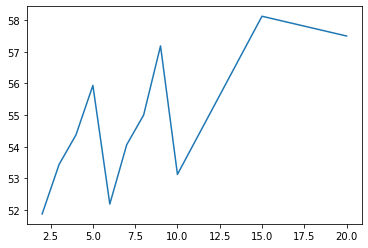

In [19]:
test_set = (2,3,4,5,6,7,8,9,10,15,20)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters, mean, std = nn_model(X_train, Y_train, n_h = i, scaling_factor = 0.001, learning_rate = 0.3, num_iterations = 5000)
    predictions = predict(parameters, mean, std, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with %d units in hidden layer is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i
  
plt.plot(test_set, accuracy_log)
print("The best number of hidden layer units is %d." %best_result)

### 3.4. Random initialization scaling factor

The accuracy with scaling factor 0.001 is: 56.2 % 
The accuracy with scaling factor 0.003 is: 54.7 % 
The accuracy with scaling factor 0.010 is: 56.9 % 
The accuracy with scaling factor 0.030 is: 55.9 % 
The accuracy with scaling factor 0.100 is: 55.9 % 
The accuracy with scaling factor 0.300 is: 53.1 % 
The accuracy with scaling factor 1.000 is: 59.4 % 
The best scaling factor is 1.000.


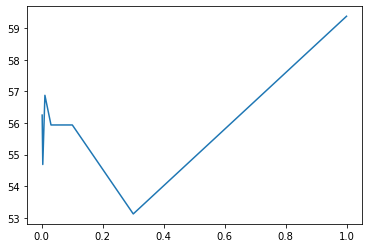

In [20]:
test_set = (0.001,0.003,0.01,0.03,0.1,0.3,1)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters, mean, std = nn_model(X_train, Y_train, n_h = 15, scaling_factor = i, learning_rate = 0.3, num_iterations = 5000)
    predictions = predict(parameters, mean, std, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with scaling factor %.3f is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best scaling factor is %.3f." %best_result)

### 3.5. Learning rate

The accuracy with learning rate 0.03 is: 52.2 % 
The accuracy with learning rate 0.10 is: 55.9 % 
The accuracy with learning rate 0.30 is: 55.0 % 
The accuracy with learning rate 0.50 is: 60.9 % 
The accuracy with learning rate 0.70 is: 54.4 % 
The accuracy with learning rate 0.90 is: 53.4 % 
The accuracy with learning rate 1.10 is: 56.9 % 
The accuracy with learning rate 1.30 is: 55.3 % 
The accuracy with learning rate 1.50 is: 53.1 % 
The accuracy with learning rate 1.80 is: 56.9 % 
The best learning rate is 0.50.


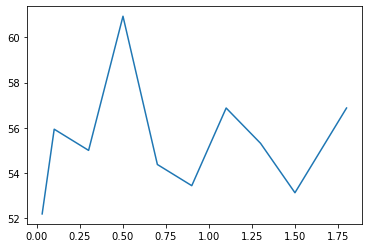

In [26]:
test_set = (0.03,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters, mean, std = nn_model(X_train, Y_train, n_h = 15, scaling_factor = 1, learning_rate = i, num_iterations = 10000)
    predictions = predict(parameters, mean, std, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with learning rate %.2f is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best learning rate is %.2f." %best_result)

### 3.6. Number of iterations

The accuracy with 1000 iterations is: 55.9 % 
The accuracy with 2000 iterations is: 52.8 % 
The accuracy with 5000 iterations is: 56.2 % 
The accuracy with 10000 iterations is: 55.3 % 
The accuracy with 20000 iterations is: 51.9 % 
The accuracy with 50000 iterations is: 56.2 % 
The best number of iterations is 5000.


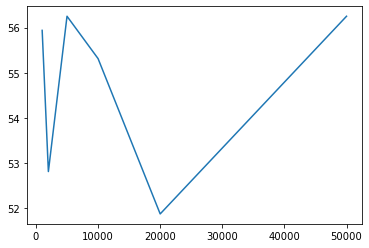

In [24]:
test_set = (1000,2000,5000,10000,20000,50000)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters, mean, std = nn_model(X_train, Y_train, n_h = 15, scaling_factor = 1, learning_rate = 1.8, num_iterations = i)
    predictions = predict(parameters, mean, std, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with %d iterations is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best number of iterations is %d." %best_result)

### 3.7. Iterating through all the HP values to understand the performance better

***Warning*** This is not by any means something efficient to do in practice and is being carried out here just for learning purposes!       

For furthur information, check out the HPAnalysis directory.

In [ ]:
test_set1 = (2,3,4,5,6,7,8,9,10,11,12,15,17,20)
test_set2 = (0.001,0.003,0.01,0.03,0.1,0.3,1)
test_set3 = (0.03,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8)
test_set4 = (500,1000,2000,3000,5000,7000,10000,15000,20000,30000,50000)
max_accuracy = 0
best_result = {}
f = open('HPTunningResults.csv', 'w')
for i in test_set1:
    print("\nn_h = %d" %i)
    for j in test_set2:
        print("\nscaling_factor = %.3f" %j)
        for k in test_set3:
            print("\nlearning_rate= %.2f" %k)
            for l in test_set4:
                parameters , cost = nn_model(X_train, Y_train, n_h = i, scaling_factor =j, learning_rate = k, num_iterations = l)
                predictions = predict(parameters, X_cv)
                accuracy = pred_evaluation(predictions,Y_cv)
                print("n_h= %d scaling_factor= %.3f learning_rate= %.2f iterations= %d cost= %.6f ---> %.1f %% " %(i,j,k,l,cost,accuracy))
                print('%d,%.3f,%.2f,%d,%.6f,%.3f' %(i,j,k,l,cost,accuracy), file=f)
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_result["n_h"],best_result["scaling_factor"],best_result["learning_rate"],best_result["num_iterations"] = i , j , k , l
f.close()
print("\n\n")
print(best_result)

## 4. Predicting and Evaluation

### 4.1. Predicting with simple linear reagression model as a baseline

Here I used the original labels (scores from 3 to 8) to train and predict. Besides, there is no cross validation set defined here.

In [16]:
clf = LinearRegression(normalize=True,copy_X=True);
orgX_train , orgX_test , orgY_train , orgY_test = train_test_split(X.T, Y.T, train_size = 0.8)
clf.fit(orgX_train, orgY_train, sample_weight=None);
pred = clf.predict(orgX_test)
pred = pred.astype(int)
accuracy = np.sum((pred==orgY_test).astype(int))/np.shape(pred)[0]*100
print("Accuracy with training simple linear regression model is %.1f %%." %accuracy)

Accuracy with training simple linear regression model is 44.7 %.


### 4.2. Predicting with trained model

Here I have used the convention of treating each score (3 to 8) as a seperate class and definig the labels as an array with 1 for the desired class and 0 for the rest. For example:  
Score 3 : array([1,0,0,0,0,0])  
Score 4 : array([0,1,0,0,0,0])  
Score 5 : array([0,0,1,0,0,0])  
and so on.

In [34]:
parameters, mean, std = nn_model(X_train, Y_train, n_h = 15, scaling_factor = 0.01, learning_rate = 0.5, num_iterations = 20000, print_cost=True)
predictions = predict(parameters, mean, std, X_test)
accuracy = pred_evaluation(predictions,Y_test)
print("The model accuracy is %.1f %%" %accuracy)

Cost after iteration 0: 9.795485
Cost after iteration 1000: 1.356207
Cost after iteration 2000: 1.271664
Cost after iteration 3000: 1.234339
Cost after iteration 4000: 1.200826
Cost after iteration 5000: 1.178274
Cost after iteration 6000: 1.162073
Cost after iteration 7000: 1.148497
Cost after iteration 8000: 1.135651
Cost after iteration 9000: 1.122257
Cost after iteration 10000: 1.112891
Cost after iteration 11000: 1.103164
Cost after iteration 12000: 1.097168
Cost after iteration 13000: 1.094435
Cost after iteration 14000: 1.090542
Cost after iteration 15000: 1.086967
Cost after iteration 16000: 1.083628
Cost after iteration 17000: 1.080411
Cost after iteration 18000: 1.076593
Cost after iteration 19000: 1.070984
The model accuracy is 53.4 %


### 4.3. NNRank classification

The problem with previous mapping of the scores is that it does not take into acount the order in scores. These classes have an ordinal relation which is a valuable information if could be put to a use. To capture this information, here I build the labels' matrix by NNRank convetion. That is, the label arrays are defined as follows:  
Score 3 : array([1,0,0,0,0,0])  
Score 4 : array([1,1,0,0,0,0])  
Score 5 : array([1,1,1,0,0,0])  
and so on.

In [29]:
rankY = np.empty((0,m), int)
for i in range(3,9):
    rankY = np.append(rankY,(i<=Y).astype(int),axis=0)
rankX_train , rankX_test , rankY_train , rankY_test = train_test_split(X.T, rankY.T, train_size = 0.8)
rankX_train , rankX_cv , rankY_train , rankY_cv = train_test_split(rankX_train, rankY_train, train_size = 0.75)
rankX_train = rankX_train.T
rankX_cv = rankX_cv.T
rankX_test = rankX_test.T
rankY_train = rankY_train.T
rankY_cv = rankY_cv.T
rankY_test = rankY_test.T

I cannot use the previous prediction function, because it assumed 6 different output classes, but I want to take into acount the ordrinal relation between these classes. 

There are several approaches to do the prediction. In the first one, I build a cumulative probability matrix. That is, in each row, the probability is the mean of that node and previous ones. For example, assume an output array for a certain sample as follows:  
sample m output = array ( [0.8, 0.7, 0.4, 0.1, 0.1, 0.0] )  
The cumulative probability array for this sample would be:  
cumulativep = array ( [0.8, 0.75, 0.63, 0.5, 0.42, 0.35] )

As for the prediction, I just simply scan through output nodes and stop when the output of a node is smaller than the predefined threshold. The index k of the last node whose output is bigger than threshold is the predicted category of the data point.

In [30]:
def oPredict1(parameters, mean, std, X, threshold):
    
    X = (X-mean)/std
    
    A2, tmp = forward_propagation(X, parameters)
    
    m = np.shape(X)[1]
    cumulativep = np.zeros((n_y,m),float)
    for i in range(0,n_y):
        cumulativep[i] = np.mean(A2[:i+1],axis=0)
    
    predictions = np.zeros((n_y,m), int)
    # I implemented this vectorized method so that I would not be forced to iterate through all examples!
    for i in range(0,n_y):
        predictions[:i+1] += (cumulativep[i]>threshold).astype(int)
    predictions = (predictions>0).astype(int)
       
    return predictions

Here, I build a 0/1 matrix based on the probability of each node, then I take the average of these values just like cumulative matrix in the previous method. For example, assume an output array for a certain sample as follows:  
sample m output = array ( [0.8, 0.7, 0.4, 0.1, 0.1, 0.0] )  
It will be transformed to array ( [1, 1, 0, 0, 0, 0] )  
Then I build a matrix by averaging, which for our example results in array ( [1, 1, 0.67, 0.5, 0.4, 0.33] )

For the prediction, I just simply scan through output nodes and stop when the output of a node is smaller than the predefined threshold. The index k of the last node whose output is bigger than threshold is the predicted category of the data point.

In [31]:
def oPredict2(parameters, mean, std, X, threshold):
    
    X = (X-mean)/std
    
    A2, tmp = forward_propagation(X, parameters)
    
    m = np.shape(X)[1]
    A2 = (A2>0.5).astype(int)
    temp = np.zeros((n_y,m),float)
    for i in range(0,n_y):
        temp[i] = np.mean(A2[:i+1],axis=0)
    
    predictions = np.zeros((n_y,m), int)
    # I implemented this vectorized method so that I would not be forced to iterate through all examples!
    for i in range(0,n_y):
        predictions[:i+1] += (temp[i]>threshold).astype(int)
    predictions = (predictions>0).astype(int)
       
    return predictions

As for my third prediction method, I just simply scan through output nodes and stop when the output of a node is smaller than the predefined threshold for the sigmoid function (0.5). The index k of the last node whose output is bigger than threshold is the predicted category of the data point.

In [32]:
def oPredict3(parameters, mean, std, X):
    
    X = (X-mean)/std
    
    A2, tmp = forward_propagation(X, parameters)
    
    m = np.shape(X)[1]
    A2 = (A2>0.5).astype(int)
       
    predictions = np.zeros((n_y,m), int)
    # I implemented this vectorized method so that I would not be forced to iterate through all examples!
    for i in range(0,n_y):
        predictions[:i+1] += A2[i]
    predictions = (predictions>0).astype(int)
       
    return predictions

Here I run a test to find the best threshold for the first and the second prediction methods on cross validation set.

The accuracy for 3 predictions with threshold 0.50 are: 0.9 % , 2.8 % , 56.9 % respectively
The accuracy for 3 predictions with threshold 0.55 are: 2.8 % , 3.4 % , 58.8 % respectively
The accuracy for 3 predictions with threshold 0.60 are: 3.8 % , 15.3 % , 56.6 % respectively
The accuracy for 3 predictions with threshold 0.65 are: 10.3 % , 14.1 % , 59.1 % respectively
The accuracy for 3 predictions with threshold 0.70 are: 18.8 % , 17.5 % , 61.9 % respectively
The accuracy for 3 predictions with threshold 0.75 are: 26.9 % , 35.6 % , 55.9 % respectively
The accuracy for 3 predictions with threshold 0.80 are: 46.2 % , 55.0 % , 61.9 % respectively
The accuracy for 3 predictions with threshold 0.85 are: 50.6 % , 53.1 % , 54.1 % respectively
The accuracy for 3 predictions with threshold 0.90 are: 55.3 % , 55.6 % , 55.6 % respectively
The accuracy for 3 predictions with threshold 0.95 are: 53.4 % , 59.7 % , 59.7 % respectively

The best threshold for first prediction is 0.90
The best thresho

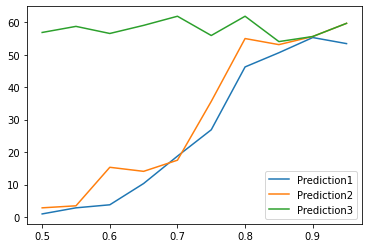

In [35]:
test_set = (0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95)
accuracy_log1 = []
accuracy_log2 = []
accuracy_log3 = []
max_accuracy1 = 0
best_result1 = 0
max_accuracy2 = 0
best_result2 = 0
for i in test_set:
    parameters, mean, std = nn_model(rankX_train, rankY_train, n_h = 15, scaling_factor = 0.01, learning_rate = 0.5, num_iterations = 20000)
    predictions1 = oPredict1(parameters, mean, std, rankX_cv, threshold = i)
    accuracy1 = pred_evaluation(predictions1,rankY_cv)
    predictions2 = oPredict2(parameters, mean, std, rankX_cv, threshold = i)
    accuracy2 = pred_evaluation(predictions2,rankY_cv)
    predictions3 = oPredict3(parameters, mean, std, rankX_cv)
    accuracy3 = pred_evaluation(predictions3,rankY_cv)
    accuracy_log1.append(accuracy1)
    accuracy_log2.append(accuracy2)
    accuracy_log3.append(accuracy3)
    print("The accuracy for 3 predictions with threshold %.2f are: %.1f %% , %.1f %% , %.1f %% respectively" %(i,accuracy1,accuracy2,accuracy3))
    if accuracy1 > max_accuracy1:
        max_accuracy1 = accuracy1
        best_result1 = i
    if accuracy2 > max_accuracy2:
        max_accuracy2 = accuracy2
        best_result2 = i

print()
plt.plot(test_set, accuracy_log1, label='Prediction1')
print("The best threshold for first prediction is %.2f" %best_result1)
plt.plot(test_set, accuracy_log2, label='Prediction2')
print("The best threshold for second prediction is %0.2f" %best_result2)
plt.plot(test_set, accuracy_log3, label='Prediction3')
print("This third prediction function has no threshold!")
plt.legend()

The third prediction method is obviously working better. It is acutually pretty similar to the first and second model, if their threshold is set to 1. Now I can run my ordinal prediction methods on test set based on retrieved thresholds.

In [37]:
parameters,mean,std= nn_model(rankX_train, rankY_train, n_h = 15, scaling_factor = 0.01, learning_rate = 0.5, num_iterations = 20000, print_cost=True)
predictions1 = oPredict1(parameters, mean, std, rankX_test, threshold = 0.90)
accuracy1 = pred_evaluation(predictions1,rankY_test)
print("The prediction1 accuracy is %.1f %%" %accuracy1)
predictions2 = oPredict2(parameters, mean, std, rankX_test, threshold = 0.95)
accuracy2 = pred_evaluation(predictions2,rankY_test)
print("The prediction2 accuracy is %.1f %%" %accuracy2)
predictions3 = oPredict3(parameters, mean, std, rankX_test)
accuracy3 = pred_evaluation(predictions3,rankY_test)
print("The prediction3 accuracy is %.1f %%" %accuracy3)

Cost after iteration 0: 4.158968
Cost after iteration 1000: 0.788779
Cost after iteration 2000: 0.712546
Cost after iteration 3000: 0.677749
Cost after iteration 4000: 0.659187
Cost after iteration 5000: 0.644352
Cost after iteration 6000: 0.627770
Cost after iteration 7000: 0.617470
Cost after iteration 8000: 0.610441
Cost after iteration 9000: 0.604114
Cost after iteration 10000: 0.598275
Cost after iteration 11000: 0.591686
Cost after iteration 12000: 0.586357
Cost after iteration 13000: 0.577828
Cost after iteration 14000: 0.571656
Cost after iteration 15000: 0.567553
Cost after iteration 16000: 0.564152
Cost after iteration 17000: 0.561094
Cost after iteration 18000: 0.558391
Cost after iteration 19000: 0.555965
The prediction1 accuracy is 52.8 %
The prediction2 accuracy is 55.3 %
The prediction3 accuracy is 55.3 %


### 4.4. Conclusion

The trained neural network seems to be working reasonably better than the linear regression on this data set, but using NNRank instead of simple classification doesn't seem to have a significant impact on the accuracy.